<a href="https://colab.research.google.com/github/emmanhok/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Aquí estuve investigando sobre cómo obtener los datos de una determinada columna
#tienda['Precio']
# Una vez he investigado ello, probé la forma de obtener la suma de todos los precios a través de la función integrada sum()
# Cálculos del ingreso total de cada tienda
ingreso_total_tienda = sum(tienda['Precio'])
print(f'El ingreso total de la tienda 1 es: {ingreso_total_tienda}')
ingreso_total_tienda2 = sum(tienda2['Precio'])
print(f'El ingreso total de la tienda 2 es: {ingreso_total_tienda2}')
ingreso_total_tienda3 = sum(tienda3['Precio'])
print(f'El ingreso total de la tienda 3 es: {ingreso_total_tienda3}')
ingreso_total_tienda4 = sum(tienda4['Precio'])
print(f'El ingreso total de la tienda 4 es: {ingreso_total_tienda4}')


El ingreso total de la tienda 1 es: 1150880400.0
El ingreso total de la tienda 2 es: 1116343500.0
El ingreso total de la tienda 3 es: 1098019600.0
El ingreso total de la tienda 4 es: 1038375700.0


# 2. Ventas por categoría

In [ ]:
# En un primer momento realizo esto para probar si entiendo la lógica de cómo acceder a las categorías y poder contar la cantidad de ventas en ellas
#def contador_categoria_electronicos(tienda):
#  contador = 0
#  for i in range(len(tienda['Categoría del Producto'])):
#    if tienda['Categoría del Producto'].iloc[i] == 'Electrónicos':
#      contador += 1
#  return contador
#contador_categoria_electronicos(tienda)  # Aqui solo comprobaba que me diera el resultado esperado tel total de ventas de categoria electronicos de la p1rimera tienda


In [ ]:
# Una vez entendi el acceso a las categoria procedere a realizar un codigo que me permita
# automatizar el conteo de ventas de diversas categorias para aplicarlo a cada tienda

In [ ]:
# Primero crearé un diccionario para poder iterar más facilmente las categorias en las diversas tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

In [ ]:
# Funcion para obtener la cantidad de categorías y la sumatoria de los valores de ventas de cada una de ellas de las 4 tiendas
def ventas_por_categoria(df): # Con df me refiero a los DataFrame de cada tienda
  ingresos_por_categoria = {} # Creo un diccionario para almacenar la suma de ingresos por categoría
  # Utilizo un ciclo for para acceder a 'Categorías del Producto' y a 'Precio'
  for i in range(len(df)):
    categoria = df['Categoría del Producto'].iloc[i] # Aqui obtengo la categoría actual [i]
    precio = df['Precio'].iloc[i] # Aqui obtengo el precio actual [i]
    # Si la categoría ya está en el diccionario, sumo el precio al total existente.
    if categoria in ingresos_por_categoria:
      ingresos_por_categoria[categoria] += precio # Voy sumando el precio del producto de la categoría
    else:
      ingresos_por_categoria[categoria] = precio
  return ingresos_por_categoria

In [ ]:
# A continuación imprimo a modo de títulos lo siguiente:
print('Ventas por categoría de cada tienda en orden de más a menos populares:\n')
# Con un ciclo for ire iterando sobre los items del diccionario tiendas creado mas arriba
# en cada tienda y cada df de ellas segun la funcion anterior
for nombre_tienda, df_tienda in tiendas.items():
  print(f'{nombre_tienda}:')
  # Llamo a la función para calcular los ingresos por ventas de cada categoría
  ingresos_por_categoria = ventas_por_categoria(df_tienda)
  # Ordenamiento de las categorías por ingresos (de mayor a menor)
  ordenamiento_ingresos_categorias = sorted(ingresos_por_categoria.items(), key=lambda item: item[1], reverse=True)
  # Impresión de la lista de tuplas obtenidas a traces de un ciclo for
  for categoria, ingresos in ordenamiento_ingresos_categorias:
    print(f'  {categoria}: ${ingresos:.2f}')
  print('\n') # Salto de línea para separar la salida de cada tienda

Ventas por categoría de cada tienda en orden de más a menos populares:

Tienda 1:
  Electrónicos: $429493500.00
  Electrodomésticos: $363685200.00
  Muebles: $187633700.00
  Instrumentos musicales: $91299000.00
  Deportes y diversión: $39290000.00
  Juguetes: $17995700.00
  Artículos para el hogar: $12698400.00
  Libros: $8784900.00


Tienda 2:
  Electrónicos: $410831100.00
  Electrodomésticos: $348567800.00
  Muebles: $176426300.00
  Instrumentos musicales: $104990300.00
  Deportes y diversión: $34744500.00
  Juguetes: $15945400.00
  Artículos para el hogar: $14746900.00
  Libros: $10091200.00


Tienda 3:
  Electrónicos: $410775800.00
  Electrodomésticos: $329237900.00
  Muebles: $201072100.00
  Instrumentos musicales: $77380900.00
  Deportes y diversión: $35593100.00
  Juguetes: $19401100.00
  Artículos para el hogar: $15060000.00
  Libros: $9498700.00


Tienda 4:
  Electrónicos: $409476100.00
  Electrodomésticos: $283260200.00
  Muebles: $192528900.00
  Instrumentos musicales: $7510

# 3. Calificación promedio de la tienda


In [ ]:
# Funcion para calcular el promedio de calificacion de cada tienda

In [ ]:
def calcular_promedio_calificacion(df):
  suma_de_calificaciones = 0
  conteo_de_calificaciones = 0
  # Ciclo for para recorrer las calificaciones sumandolas y aumentando contador para realizar la division luego
  for i in range(len(df['Calificación'])):
    calificacion = df['Calificación'].iloc[i]

    suma_de_calificaciones += calificacion
    conteo_de_calificaciones += 1
  # Bloque try-except por si hay un error al dividir por 0 que no es viable
  try:
    media = suma_de_calificaciones / conteo_de_calificaciones
  except ZeroDivisionError:
    print(f'No se puede dividir por 0.\n Error: {e}')
    media = 0
  return media

In [ ]:
# Llamado a la funcion para calcular el promedio de calificaciones

In [ ]:
print('Calificaciones promedio de cada tienda:\n')
for nombre_tienda, df_tienda in tiendas.items():
  promedio_calificacion = calcular_promedio_calificacion(df_tienda)
  print(f'La valoración media de la {nombre_tienda} es: {promedio_calificacion:.2f}\n')

Calificaciones promedio de cada tienda:

La valoración media de la Tienda 1 es: 3.98

La valoración media de la Tienda 2 es: 4.04

La valoración media de la Tienda 3 es: 4.05

La valoración media de la Tienda 4 es: 4.00



In [ ]:
  # Para garantizar la precisión de mis cálculos de promediar calificaciones, especialmente al trabajar con DataFrames grandes donde no es práctico revisar cada fila
  # manualmente, investigué y apliqué una técnica de depuración de código.
  # Esto me permitió observar el flujo de la función calcular_promedio_calificacion paso a paso,
  # verificando la suma y el conteo de las calificaciones en cada etapa,
  # hasta confirmar que procesaba correctamente todas las entradas.
  # Aqui presento la utilizacion de DEBUG para confirmar los resultados de forma correcta

  #def calcular_promedio_calificacion(df):
  #  suma_de_calificaciones = 0
  #  conteo_de_calificaciones = 0

    # Depuración 1: Antes del bucle
  #  print(f"DEBUG: Iniciando cálculo de media. DataFrame tiene {len(df)} filas.")
  #  print(f"DEBUG: Columnas disponibles: {df.columns.tolist()}") # Para verificar que 'Calificación' existe

    # Ciclo for para recorrer las calificaciones sumandolas y aumentando contador para realizar la division luego
  #  for i in range(len(df['Calificación'])):
  #    calificacion = df['Calificación'].iloc[i]

      # Depuración 2: Dentro del bucle
          # print(f"DEBUG: Fila {i}: Calificación = {calificacion}") # Me permite ver si el bucle for está realmente iterando y procesando cada fila individualmente.

  #    suma_de_calificaciones += calificacion
  #    conteo_de_calificaciones += 1

    # Depuración 3: Después del bucle, antes del cálculo final (Validación de Agregación)
  #  print(f"DEBUG: Bucle terminado. Suma total de calificaciones: {suma_de_calificaciones}")
  #  print(f"DEBUG: Conteo total de calificaciones procesadas: {conteo_de_calificaciones}")

    # Bloque try-except por si hay un error al dividir por 0 que no es viable
  #  try:
  #    media = suma_de_calificaciones / conteo_de_calificaciones
  #  except ZeroDivisionError:
  #    print(f'No se puede dividir por 0.\n Error: {e}')
  #    media = 0

  #  print(f"DEBUG: Función finalizada. Retornando media: {media}") # Debugging del valor de retorno

  #  return media

# 4. Productos más y menos vendidos

In [ ]:
# Productos más y menos vendidos por tienda
# Creo un DataFrame para cada tienda con los datos de productos vendidos
# Esta linea de codigo tambien debe ser ejecutada previa a los graficos para poder generarlos
urls = [url, url2, url3, url4]

In [ ]:
# Uno todos los datos en un único DataFrame para un análisis comparativo y por tienda
dfs = []
for i, url in enumerate(urls):
    try:
        df = pd.read_csv(url)
        # Asigno el nombre de la tienda para poder agrupar por ella más tarde
        df['Tienda'] = f"Tienda {i+1}"
        dfs.append(df)
    except Exception as e:
        print(f"Error al leer {url}: {e}") # En caso de error, podríamos saltar esta URL o manejarlo de otra forma.
# Concateno todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index=True)

# Aseguro que las columnas numéricas tengan el tipo de dato correcto
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

In [ ]:
# A continuacion calculo los ingresos totales y la cantidad de unidades vendidas por producto y tienda
# Agrupo por Tienda y Producto para obtener la suma de ingresos y la cuenta de unidades
productos_resumen = df_total.groupby(['Tienda', 'Producto']).agg( # Uso .agg() para aplicar múltiples funciones de agregación
    total_ingresos=('Precio', 'sum'),  # Calculo la suma del 'Precio'
    unidades_vendidas=('Producto', 'size') # Cuento el número de ocurrencias del 'Producto'
    ).reset_index() # Resetea el índice para que 'Tienda' y 'Producto' vuelvan a ser columnas

In [ ]:
# Función para mostrar los top 3 de mas y menos vendidos
def imprimir_top_productos(df_resumen, numero_de_productos=3):

    # Obtengo una lista única de tiendas para iterar
    tiendas_unicas = df_resumen['Tienda'].unique()

    print("Análisis de ventas de productos mas y menos vendidos por tienda")
    # Itero sobre cada tienda para mostrar los productos más y menos vendidos
    for tienda_actual in tiendas_unicas:
        print(f"\n{tienda_actual}: ")

        # Filtro los datos de la tienda actual
        data_tienda = df_resumen[df_resumen['Tienda'] == tienda_actual].copy() # Uso .copy() para evitar el SettingWithCopyWarning de Pandas

        # Ordeno por ingresos totales para obtener los más vendidos
        mas_vendidos = data_tienda.sort_values(by='total_ingresos', ascending=False).head(numero_de_productos)

        # Ordeno por ingresos para obtener los menos vendidos
        menos_vendidos = data_tienda.sort_values(by='total_ingresos', ascending=True).head(numero_de_productos)

        # Muestro los productos que más ingresos generaron
        print(f"\n TOP de los {numero_de_productos} productos que dieron más ingresos:")
        for _, row in mas_vendidos.iterrows():
            print(f"  - {row['Producto']}: ${row['total_ingresos']:.2f} (Unidades: {int(row['unidades_vendidas'])})")

        # Muestro los productos que menos ingresos generaron
        print(f"\n TOP de los {numero_de_productos} productos que dieron menos ingresos:")
        for _, row in menos_vendidos.iterrows():
            print(f"  - {row['Producto']}: ${row['total_ingresos']:.2f} (Unidades: {int(row['unidades_vendidas'])})")
        print(' ')
        print('-' * 50) # Separador entre tiendas

In [ ]:
# Llamo a la función para mostrar los resultados
imprimir_top_productos(productos_resumen, numero_de_productos=3)

Análisis de ventas de productos mas y menos vendidos por tienda

Tienda 1: 

 TOP de los 3 productos que dieron más ingresos:
  - TV LED UHD 4K: $142150200.00 (Unidades: 60)
  - Refrigerador: $112143300.00 (Unidades: 54)
  - Iphone 15: $97902200.00 (Unidades: 49)

 TOP de los 3 productos que dieron menos ingresos:
  - Cuerda para saltar: $652800.00 (Unidades: 40)
  - Dinosaurio Rex: $688900.00 (Unidades: 40)
  - Cubo mágico 8x8: $696900.00 (Unidades: 44)
 
--------------------------------------------------

Tienda 2: 

 TOP de los 3 productos que dieron más ingresos:
  - Iphone 15: $113225800.00 (Unidades: 55)
  - TV LED UHD 4K: $103375000.00 (Unidades: 45)
  - Refrigerador: $97632500.00 (Unidades: 49)

 TOP de los 3 productos que dieron menos ingresos:
  - Cubo mágico 8x8: $643600.00 (Unidades: 45)
  - Dinosaurio Rex: $770300.00 (Unidades: 42)
  - Cuerda para saltar: $856900.00 (Unidades: 50)
 
--------------------------------------------------

Tienda 3: 

 TOP de los 3 productos que

# 5. Envío promedio por tienda

In [ ]:
# Funcion para calcular los costos de envíos promedios para cada tienda.
def calcular_envio_promedio_adaptado(dataframe_tienda, nombre_tienda):
  # Primero, preparo una lista vacía donde voy a guardar todos los costos de envío que encuentre.
  costos_envio = []
  # Luego, recorro cada una de las filas del DataFrame de la tienda.
  # El método .iterrows() me permite procesar cada registro individualmente.
  for _, fila in dataframe_tienda.iterrows():
    # Para cada fila, intento obtener el 'Costo de envío'.
    # Utilizo un bloque try-except para asegurar que mi código sea preciso.
    try:
      # Convierto el valor de la columna 'Costo de envío' a un número decimal (flotante).
      costo_envio = float(fila['Costo de envío'])
      # Si la conversión es exitosa, añado este costo a mi lista de costos de envío.
      costos_envio.append(costo_envio)
      # Si el valor no es un número válido (ValueError) o si la columna 'Costo de envío'
      # no existe en alguna fila (KeyError), no hago nada y simplemente paso a la siguiente fila.
    except (ValueError, KeyError):
      pass
  # Después de procesar todas las filas, calculo el promedio de los costos de envío.
  # antes de dividir, verifico si la lista 'costos_envio' tiene elementos para evitar un error de división por cero.
  # si hay costos, los sumo y divido por la cantidad de costos. Si no hay costos, el promedio es 0.0.
  promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0.0
  # Finalmente, imprimo un mensaje mostrando el nombre de la tienda y su costo de envío promedio
  print(f"{nombre_tienda} -> Envío promedio: ${promedio_envio:.2f}")

In [ ]:
print("\nCosto de envío promedio por tienda: ")
# Luego, itero sobre cada tienda y su DataFrame correspondiente que tengo en mi diccionario 'tiendas'.
for nombre_tienda_actual, df_tienda_actual in tiendas.items():
    calcular_envio_promedio_adaptado(df_tienda_actual, nombre_tienda_actual)


Costo de envío promedio por tienda: 
Tienda 1 -> Envío promedio: $26018.61
Tienda 2 -> Envío promedio: $25216.24
Tienda 3 -> Envío promedio: $24805.68
Tienda 4 -> Envío promedio: $23459.46


# 6. Graficos

Creando mis Gráficos con Matplotlib 🎨

Aquí está el código para generar los tres tipos de gráficos con comentarios que explican mi proceso de investigación para realizarlos.

In [ ]:
# Primero cargo y combino todos los datos de las tiendas en un solo DataFrame llamado 'df_total'.
# Utilizo una comprensión de lista para leer cada CSV y añadir una columna 'Tienda' automáticamente.
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# --- Preparación de Métricas Clave ---
# Para asegurarme de que mis cálculos de dinero sean precisos,
# verifico que la columna 'Precio' sea de tipo numérico (flotante).
# Esto es esencial para poder realizar sumas y promedios correctamente.
df_total['Precio'] = df_total['Precio'].astype(float)

# En este análisis, el ingreso de cada venta es directamente el 'Precio' del producto.
df_total['Ingreso'] = df_total['Precio']

# Esto me da la facturación total que cada tienda ha generado.
facturacion_total = df_total.groupby('Tienda')['Ingreso'].sum()

# Esto me permite ver qué tan satisfechos están los clientes en promedio con cada tienda.
promedio_calificacion = df_total.groupby('Tienda')['Calificación'].mean()

# Convierto la columna 'Costo de envío' a numérica. Si hay valores no convertibles, esto causará un error (ValueError).
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Luego, agrupo por 'Tienda' y calculo el promedio del 'Costo de envío' para cada una.
costo_envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

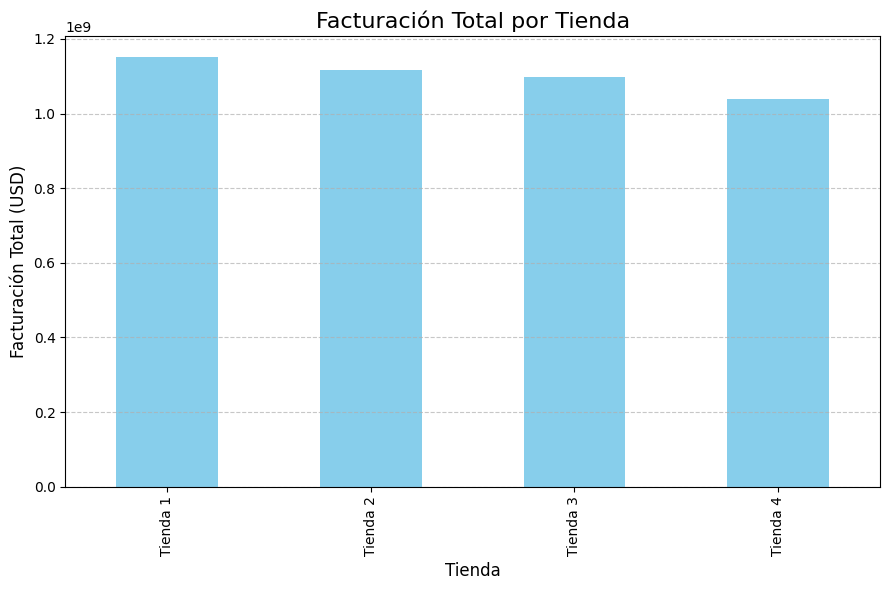

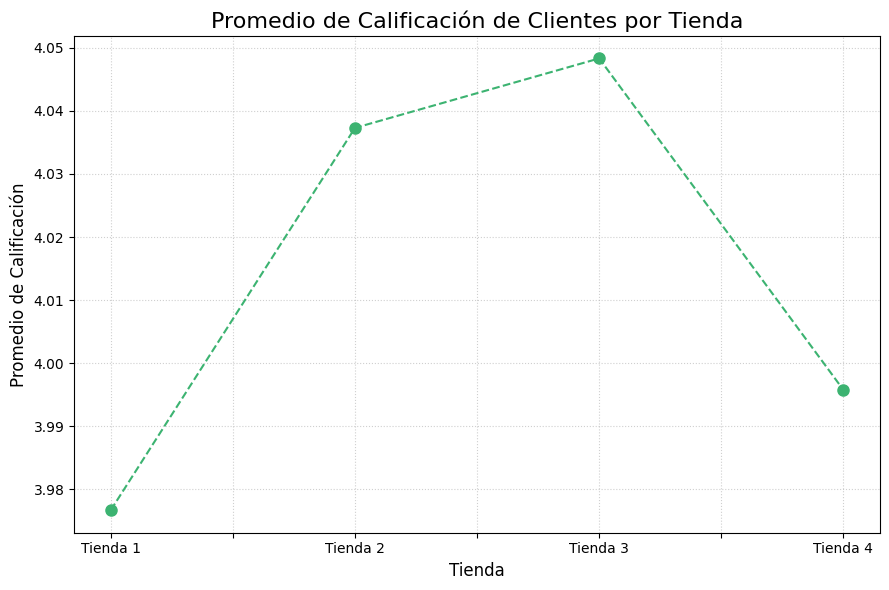

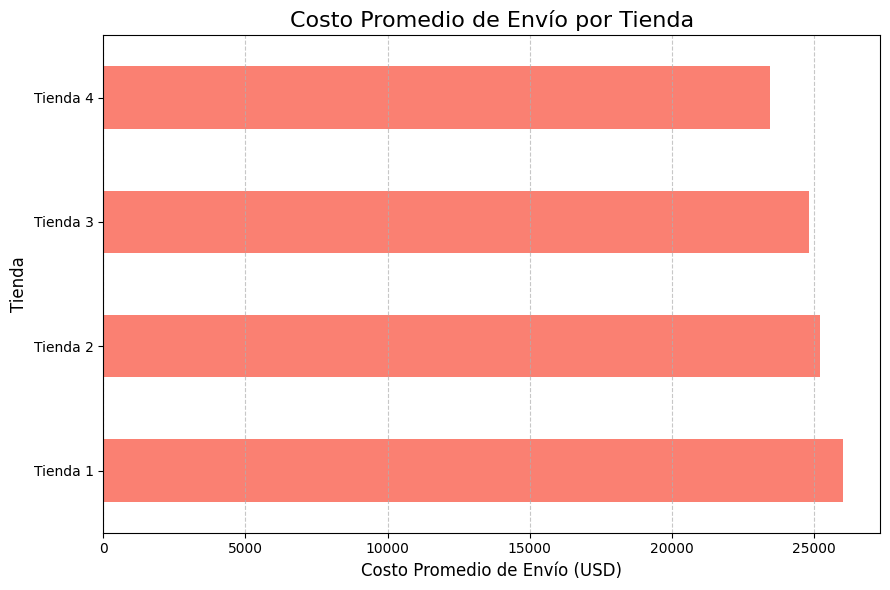

In [ ]:
# Gráfico 1: Barras Verticales - Facturación Total por Tienda
plt.figure(figsize=(9, 6))
facturacion_total.plot(kind='bar', color='skyblue')
plt.title('Facturación Total por Tienda', fontsize=16)
plt.ylabel('Facturación Total (USD)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 2: Líneas - Promedio de Calificación de Clientes por Tienda
plt.figure(figsize=(9, 6))
promedio_calificacion.plot(kind='line', marker='o', linestyle='--', color='mediumseagreen', markersize=8)
plt.title('Promedio de Calificación de Clientes por Tienda', fontsize=16)
plt.ylabel('Promedio de Calificación', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico 3: Barras Horizontales - Costo Promedio de Envío por Tienda
plt.figure(figsize=(9, 6))
costo_envio_promedio.plot(kind='barh', color='salmon')
plt.title('Costo Promedio de Envío por Tienda', fontsize=16)
plt.xlabel('Costo Promedio de Envío (USD)', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

# **Informe de Análisis de Rendimiento de Tiendas Alura Store**

---

## **Introducción: Propósito del Análisis**

Estimado Señor Juan:

El propósito de este informe es proporcionarle un análisis objetivo y detallado del rendimiento actual de las cuatro tiendas de Alura Store. Como analista de datos, he evaluado cada tienda basándome en **cinco aspectos clave**: **facturación total**, **ventas por categoría**, **calificación promedio de clientes**, **rendimiento de productos específicos (más y menos vendidos)**, y el **costo promedio de envío**.

El objetivo principal es **identificar la tienda con el menor desempeño general**, para que usted pueda tomar una decisión informada sobre cuál de estas sucursales sería la más adecuada para vender, liberando así capital para su inversión en un nuevo negocio. Mi análisis busca ser claro y objetivo, destacando las **fortalezas** y **debilidades** de cada tienda para respaldar mi recomendación final.

---

## **Desarrollo: Presentación de Datos Clave y Visualizaciones**

Para evaluar el desempeño de cada tienda, he analizado y visualizado las siguientes métricas:

### **1. Facturación Total por Tienda**

La **facturación total** es el pilar de la rentabilidad. Este indicador nos muestra la capacidad de cada tienda para generar ingresos.

* **Tienda 1:** \$1,150,880,400.00
* **Tienda 2:** \$1,116,343,500.00
* **Tienda 3:** \$1,098,019,600.00
* **Tienda 4:** \$1,038,375,700.00

Como se observa en el gráfico a continuación, la **Tienda 1 lidera** claramente en facturación, mientras que la **Tienda 4** muestra el **rendimiento más bajo** en este aspecto fundamental.

<img width="889" height="590" alt="Grafico barras vertical Ingreso Total Ventas" src="https://github.com/user-attachments/assets/4eb6204f-51d1-480f-b677-b527f94fe94d" />

---

### **2. Análisis de Ventas por Categoría y Productos Destacados**

Comprender qué se vende y con qué frecuencia nos da una visión más profunda del mercado de cada tienda.

**Ventas por Categoría (Ingreso Total por Categoría):**

* **Tienda 1:** Electrónicos (\$429M), Electrodomésticos (\$363M), Muebles (\$187M), etc.
* **Tienda 2:** Electrónicos (\$410M), Electrodomésticos (\$348M), Muebles (\$176M), etc.
* **Tienda 3:** Electrónicos (\$410M), Electrodomésticos (\$329M), Muebles (\$201M), etc.
* **Tienda 4:** Electrónicos (\$409M), Electrodomésticos (\$283M), Muebles (\$192M), etc.

**Productos Más y Menos Vendidos (por Ingreso):**

* **Productos TOP (comunes):** En todas las tiendas, los productos que más contribuyen a los ingresos son consistentemente **TV LED UHD 4K**, **Refrigerador** e **Iphone 15**. Esto subraya la importancia de estos artículos de alto valor.
* **Productos de Bajo Rendimiento (comunes):** De manera similar, **Cuerda para saltar**, **Cubo mágico 8x8** y **Dinosaurio Rex** se encuentran en los últimos lugares en términos de ingresos en todas las tiendas, lo que sugiere un bajo valor unitario y/o bajo volumen de venta.

**Fortalezas y Debilidades por este análisis:**

* **Fortaleza Consolidada:** La fuerte dependencia y alto rendimiento de las categorías de **Electrónicos** y **Electrodomésticos** es una fortaleza general en todas las tiendas.
* **Debilidad de la Tienda 4:** Aunque todas las tiendas venden productos similares, la **Tienda 4** muestra una facturación notablemente **menor** en la categoría de **Electrodomésticos** en comparación con sus pares. Esta brecha en una categoría clave contribuye significativamente a su menor facturación total. Además, su mix de productos top, aunque similar, no genera el mismo volumen de ingresos que en otras tiendas para los mismos ítems de alto valor.

---

### **3. Costo Promedio de Envío por Tienda**

El **costo de envío** es un factor que impacta directamente en la rentabilidad neta de las ventas. La eficiencia logística es crucial.

* **Tienda 1:** \$26,018.61
* **Tienda 2:** \$25,216.24
* **Tienda 3:** \$24,805.68
* **Tienda 4:** \$23,459.46

El gráfico de barras horizontales permite comparar la eficiencia en costos de envío. Aquí, la **Tienda 4** muestra la **mayor eficiencia**, con el costo promedio de envío más bajo, mientras que la **Tienda 1** incurre en los **mayores costos** de envío.

<img width="890" height="590" alt="Grafico costo envios" src="https://github.com/user-attachments/assets/8af3000b-c9d4-485e-9d73-5358cadb26d4" />

---

### **4. Promedio de Calificación de Clientes por Tienda**

La **calificación promedio de los clientes** es un indicador clave de la satisfacción general y la calidad percibida del servicio o los productos.

* **Tienda 1:** 3.98
* **Tienda 2:** 4.04
* **Tienda 3:** 4.05
* **Tienda 4:** 4.00

Como se muestra en el gráfico de líneas, las calificaciones son generalmente altas en todas las tiendas, indicando un buen nivel de satisfacción general. La **Tienda 3** y **Tienda 2** destacan ligeramente, mientras que la **Tienda 1** presenta el **promedio más bajo**, aunque la diferencia es mínima entre todas (todas están por encima de 3.9). La **Tienda 4** se mantiene en un punto intermedio, lo cual es aceptable pero no sobresaliente.

<img width="889" height="590" alt="Grafico promedio calificaciones" src="https://github.com/user-attachments/assets/7ed37eac-5053-4d3f-b4b7-b41e8cf2edc0" />

---

## **RECOMENDACIÓN FINAL**

Tras un análisis integral de los datos de rendimiento, mi recomendación es considerar la venta de la **Tienda 4**.

### **Justificación de la Elección:**

La **Tienda 4** consistentemente muestra el **menor desempeño general** en comparación con las otras tres sucursales, lo que la convierte en la candidata más lógica para ser desinvertida en favor de nuevas oportunidades de negocio. Mis razones son las siguientes:

1.  **Facturación Total Más Baja:** Este es el factor **más crítico**. La Tienda 4 es la que **menos ingresos genera**, lo que impacta directamente en la rentabilidad global del negocio. Su facturación es significativamente inferior a la de las otras tiendas, especialmente la Tienda 1.
2.  **Debilidad en Categorías Clave:** A pesar de tener un rendimiento decente en Electrónicos, la **Tienda 4** muestra una **debilidad comparativa** en la categoría de **Electrodomésticos**, que es una de las principales fuentes de ingresos para las demás tiendas. Esta disparidad contribuye directamente a su baja facturación general.
3.  **Eficiencia en Envío No Compensatoria:** Si bien la **Tienda 4** es la más eficiente en términos de costo promedio de envío (el más bajo de todas), esta eficiencia operativa **no logra impulsar su rendimiento financiero general**. Esto sugiere que el problema principal no reside en los costos logísticos, sino en la generación de ingresos y, posiblemente, en su estrategia de ventas o demanda de productos de alto valor.
4.  **Calificación del Cliente Intermedia:** Aunque su calificación promedio es aceptable (4.00), **no es lo suficientemente superior** como para compensar su debilidad financiera. No destaca por un nivel excepcional de satisfacción que pudiera justificar su menor rendimiento en ingresos.

---

## **CONCLUSIÓN**

En conclusión, la **Tienda 4** es la que presenta la **mayor debilidad financiera** y el **menor potencial de crecimiento aparente** dadas las métricas actuales. Vender esta tienda permitiría **optimizar su cartera de negocios**, liberando recursos para una inversión estratégica más prometedora que no esté lastrada por un desempeño inferior.